<a href="https://colab.research.google.com/github/trungle1101/csc527/blob/master/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#CSC/ECE/DA 427/527
#Fall 2020

from random import random
import matplotlib.pyplot as plt
import math
import numpy as np
from sklearn.metrics import mean_squared_error


## Preprocessing data

In [2]:
def moon(num_points,distance,radius,width):

 points = num_points

 x1 = [0 for _ in range(points)]
 y1 = [0 for _ in range(points)]
 x2 = [0 for _ in range(points)]
 y2 = [0 for _ in range(points)]

 for i in range(points):
    d = distance
    r = radius
    w = width
    a = random()*math.pi
    x1[i] = math.sqrt(random()) * math.cos(a)*(w/2) + ((-(r+w/2) if(random() < 0.5) else (r+w/2)) * math.cos(a))
    y1[i] = math.sqrt(random()) * math.sin(a)*(w) + (r * math.sin(a)) - d
  
    a = random()*math.pi + math.pi
    x2[i] = (r+w/2) + math.sqrt(random()) * math.cos(a)*(w/2) + ((-(r+w/2)) if(random() < 0.5) else (r+w/2)) * math.cos(a)
    y2[i] = -(math.sqrt(random()) * math.sin(a)*(-w) + (-r * math.sin(a))) + d
 return ([x1,x2,y1,y2])

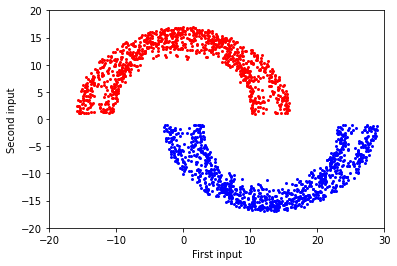

In [3]:
X1,X2,Y1,Y2 = moon(1000,-1,10,6)

plt.scatter(X1, Y1, marker='.', linewidths=0.02, color='red')
plt.scatter(X2, Y2, marker='.', linewidths=0.02, color='blue')
plt.axis([-20, 30, -20, 20])
plt.xlabel('First input')
plt.ylabel('Second input')
plt.show()

In [4]:
def Concatenate(X1,X2,Y1,Y2):
  #Convert list to numpy array and reshape
  X1 = np.asarray(X1)
  Y1 = np.asarray(Y1)
  X1 = X1.reshape(X1.shape[0],1)
  Y1 = Y1.reshape(Y1.shape[0],1)

  #Combine X and Y into one matrix X
  inputs_1 = np.concatenate((X1,Y1),axis = 1)
  #Now input has 2 features, adding feature with value 1 for bias
  X0 = np.ones((inputs_1.shape[0],1))
  inputs_1 = np.concatenate((X0,inputs_1),axis = 1)
  #Label for the first 1000 samples as 1
  label_1 = np.ones((inputs_1.shape[0],1))

  #Do the same with sample in region B
  X2 = np.asarray(X2)
  Y2 = np.asarray(Y2)
  X2 = X2.reshape(X2.shape[0],1)
  Y2 = Y2.reshape(Y2.shape[0],1)

  #Concatenate X and Y into one matrix X
  inputs_2 = np.concatenate((X2,Y2),axis = 1)
  #Adding feature with value 1 for bias
  inputs_2 = np.concatenate((X0,inputs_2),axis = 1)

  #Label for the sencond 1000 samples as -1
  label_2 = np.negative(np.ones((inputs_2.shape[0],1)))


  #Concatenate all together
  inputs = np.concatenate((inputs_1,inputs_2), axis=0)
  label = np.concatenate((label_1,label_2), axis=0)
  return inputs, label

#Check the dimension
X_train, Y_train = Concatenate(X1,X2,Y1,Y2)
print(X_train.shape)
print(Y_train.shape)


(2000, 3)
(2000, 1)


## Training class

In [5]:
class Rosenblatt:
  def __init__(seft):
    return

  def signum(self, X, w):
    sum = np.dot(X,w)
    filter = np.vectorize(lambda t: 1. if t>0 else -1.)
    return filter(sum)

  def fit(self, X, y, learning_rate = 1, epochs = 100, learning_curve = False):
    self.w = np.zeros((X.shape[1],))
    epoch_count=[]
    m = X.shape[0]
    for _ in range(epochs):
      errors = 0
      for x, y_true in zip(X, y):
        error = y_true - self.signum(x, self.w)

        if error != 0: 
          self.w += error * x
          
          errors += 1
      if learning_curve:
        Y_pred = self.predict(X)
        epoch_count.append(mean_squared_error(y, Y_pred)/m)
      if errors == 0:
        break
    plt.plot(np.squeeze(epoch_count))
    # plt.axis([0, 5, np.amin(epoch_count), np.amax(epoch_count)])
    plt.ylabel('MSE')
    plt.xlabel('Number of epochs')
    plt.show()

  def predict(self,X):
    return self.signum(X,self.w)


## Task 1

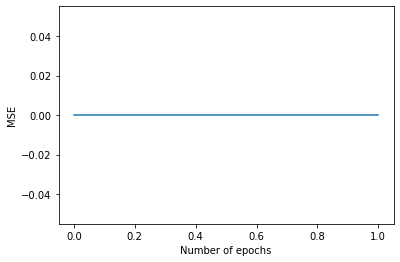

[16.         -0.33044525 56.2725848 ]


In [6]:
perceptron = Rosenblatt()
perceptron.fit(X_train,Y_train,learning_curve=True)
print(perceptron.w)

In [7]:
#Generate random 2000 samples for each region
X_test, Y_test = Concatenate(*moon(2000,-1,10,6))
Y_pred = perceptron.predict(X_test)
MSE = mean_squared_error(Y_test, Y_pred)
print(MSE)

0.0


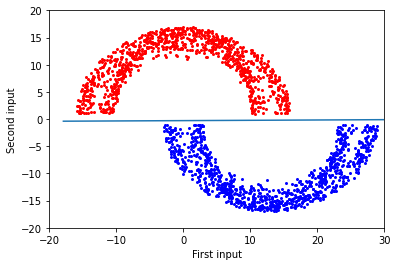

In [8]:
# getting the x co-ordinates of the decision boundary
plot_x = np.array([min(X_train[:,1]) - 2, max(X_train[:,1]) + 2])
# getting corresponding y co-ordinates of the decision boundary
plot_y = (-1/perceptron.w[2]) * (perceptron.w[1] * plot_x + perceptron.w[0])
# Plot decision boundary
plt.plot(plot_x, plot_y, label = "Decision_Boundary")

# Plot scatter points of double moon
plt.scatter(X_train[:999,1], X_train[:999,2], marker='.', linewidths=0.02, color='red')
plt.scatter(X_train[1000:,1], X_train[1000:,2], marker='.', linewidths=0.02, color='blue')
plt.axis([-20, 30, -20, 20])
plt.xlabel('First input')
plt.ylabel('Second input')

plt.show()

## Task 2

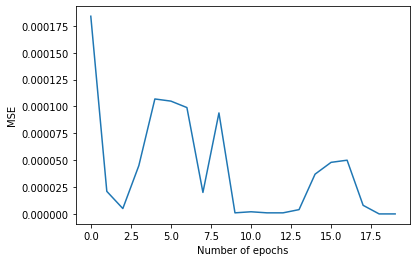

[ 22.          -2.65962261 226.53662204]


In [9]:
X_train_2, Y_train_2 = Concatenate(*moon(1000,0,10,6))
perceptron2 = Rosenblatt()
perceptron2.fit(X_train_2, Y_train_2, learning_curve=True)
print(perceptron2.w)

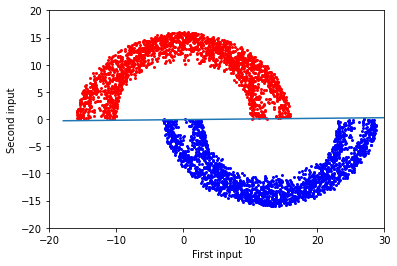

In [12]:
X_test_2, Y_test_2 = Concatenate(*moon(2000,0,10,6))
# getting the x co-ordinates of the decision boundary
plot_x = np.array([min(X_test_2[:,1]) - 2, max(X_test_2[:,1]) + 2])
# getting corresponding y co-ordinates of the decision boundary
plot_y = (-1/perceptron2.w[2]) * (perceptron2.w[1] * plot_x + perceptron2.w[0])
# Plot decision boundary
plt.plot(plot_x, plot_y, label = "Decision_Boundary")

# Plot scatter points of double moon
plt.scatter(X_test_2[:1999,1], X_test_2[:1999,2], marker='.', linewidths=0.02, color='red')
plt.scatter(X_test_2[2000:,1], X_test_2[2000:,2], marker='.', linewidths=0.02, color='blue')
plt.axis([-20, 30, -20, 20])
plt.xlabel('First input')
plt.ylabel('Second input')

plt.show()